In [1]:
from plot import *
from gen import *
from load_data import *
from func_tools import *
from AGM import *
from GM import *

### 生成随机数

In [2]:
# 这里使用默认的参数，按照均匀分布的中心点
# TODO: task 上说可以尝试有趣的pattern，我们可以手动给定centroid再生成周围点，详见 gen.py 的文档
centroids, points, N = gen_data() 

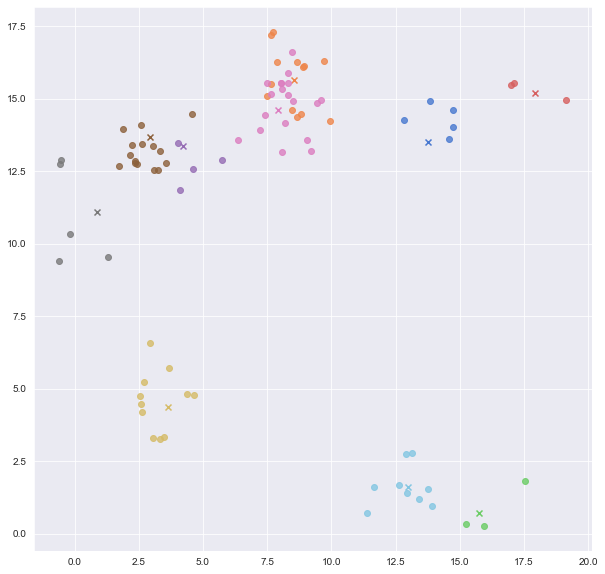

In [3]:
# 简单画个图
plt.figure(figsize=(10,10))
plot_generated_data(centroids, points, N)

### 读取数据

In [4]:
# wine, mnist, vowel, segment 可替换
# 加载稀疏矩阵
wine_data, wine_label = load_wine()
# 加载稠密矩阵
wine_data_dense, wine_label = load_wine_dense()

## AGM Sample

In [5]:
lbd = 0.05
delta = 1e-3
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd)

In [6]:
ans = AGM(grad,np.zeros_like(points),step,0.001)

In [7]:
groups = get_group(ans, tol=2)

In [8]:
groups

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2])

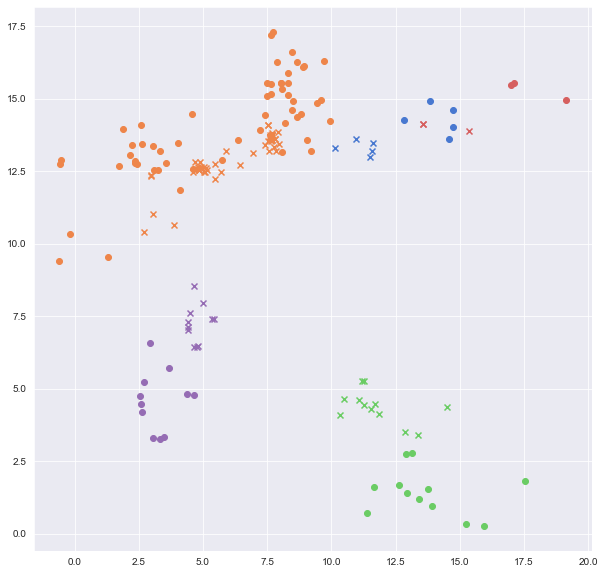

In [9]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups)

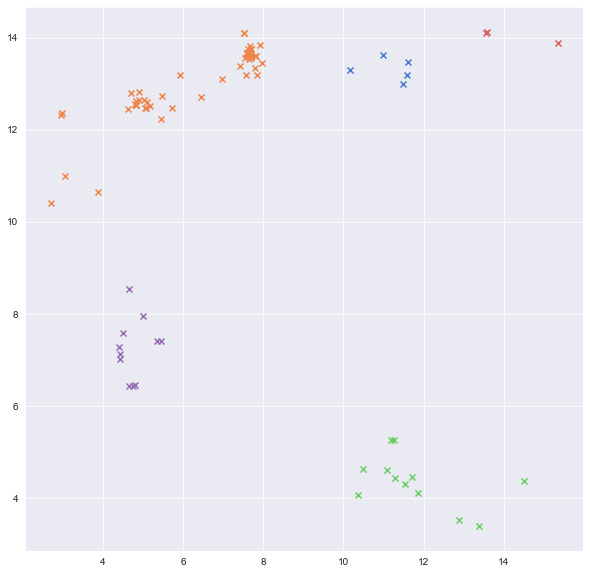

In [10]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='ans')

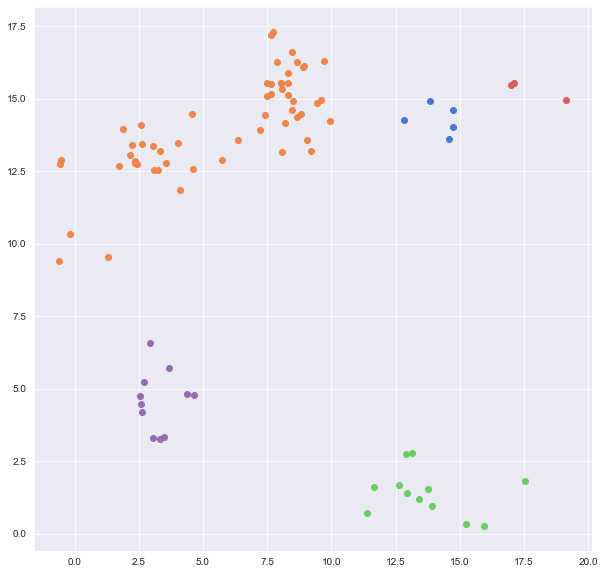

In [11]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='points')

In [14]:
lbd = 0.05
delta = 1e-3
func = lambda X: loss_func(X,points,lbd,delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd)
ans2 = GM(points,func,grad,0.5)

93.4745657241393
2.9366902938031156
2.54562492466222
2.4635577952779864
2.38444049138102
2.3101520533073576
2.2417155458810685
2.178461312575791
2.1485226236365147
2.119289994443311
2.090451888463181
2.0613501740211473
2.025348773224234
1.993181067241696
1.9644526941529552
1.9380060721672354
1.9131228998527399
1.88935562979655
1.8667331137355188
1.8447504373089747
1.8231936151347123
1.80202964050769
1.7812374462801575
1.7608014936168963
1.7407090675226344
1.720949019069152
1.7015111032703476
1.6823855597413324
1.663562760372508
1.6542803128457786
1.645069429102033
1.6359287438391203
1.626856764850554
1.6178518057894629
1.608911878602922
1.6000345127734579
1.5912164338736652
1.5824529519448922
1.5737366962403727
1.5619924308344295
1.550795219804991
1.5402078592432527
1.5301213833012013
1.5204474161039365
1.511113876136347
1.5020613432324559
1.4932397867778118
1.4846051945499932
1.476115125729304
1.467720445236375
1.4539368387986964
1.4390290716782914
1.4242932044044179
1.411668544280119

In [15]:
groups = get_group(ans2, tol=2)

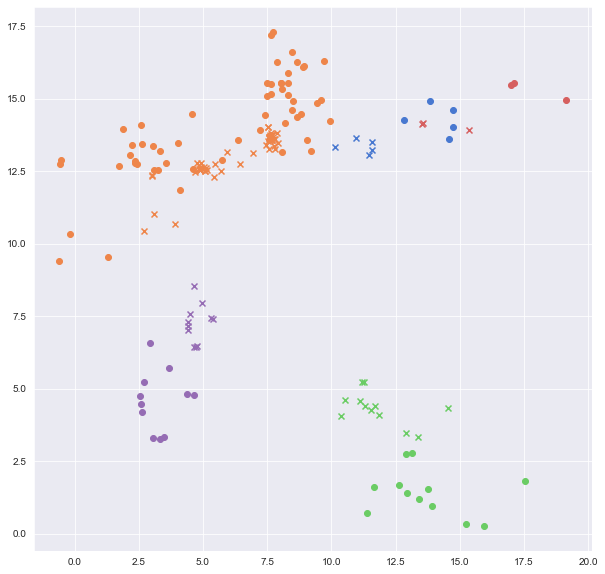

In [17]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans2,groups,way='all')